# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pickle import dump


# Import Data

In [2]:
# Read the previouly compressed data with pandas
df = pd.read_csv("/workspaces/EDA_4/data/processed/conditions_per_state.csv")
df.head()

,STATE_NAME,Physicians/10000,Primary Care Physicians/10000,Patient Care Primary Care Physicians/10000,General Surgeons/10000,Patient Care General Surgeons/10000,Median_Household_Income_2018,Percent of Population Aged 60+,anycondition_prevalence,Obesity_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Heart disease_prevalence
0,Alabama,217.1,77.2,71.2,7.6,6.9,43479.820896,23.861194,53.026866,38.273134,10.679104,16.232836,3.858209,9.616418
1,Alaska,276.9,112.8,105.6,9.6,8.5,64079.000000,17.985185,42.403704,32.048148,8.188889,11.970370,3.181481,7.448148
2,Arizona,242.0,78.1,73.2,6.9,6.1,49105.866667,26.046667,45.293333,32.160000,8.940000,13.040000,3.973333,9.000000
3,Arkansas,207.6,79.9,75.0,7.0,6.5,41801.373333,25.332000,50.680000,36.868000,10.697333,14.882667,3.789333,10.230667
4,California,279.6,96.2,87.1,7.2,6.2,67098.655172,23.184483,38.218966,27.813793,6.922414,11.325862,3.246552,6.901724


In [3]:
# Display info() method to see non-nulls and datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATE_NAME                                  51 non-null     object 
 1   Physicians/10000                            51 non-null     float64
 2   Primary Care Physicians/10000               51 non-null     float64
 3   Patient Care Primary Care Physicians/10000  51 non-null     float64
 4   General Surgeons/10000                      51 non-null     float64
 5   Patient Care General Surgeons/10000         51 non-null     float64
 6   Median_Household_Income_2018                51 non-null     float64
 7   Percent of Population Aged 60+              51 non-null     float64
 8   anycondition_prevalence                     51 non-null     float64
 9   Obesity_prevalence                          51 non-null     float64
 10  COPD_prevalence 

In [4]:
# Get the shape pf the dataframe
df.shape

(51, 14)

# Univariant Analysis

At this stage of our analysis, we will undertake a thorough univariate examination of each column in our dataset, presenting the findings through histogram-type diagrams. This methodological choice aims to effectively visualize the data count for each variable, allowing us to delve into our initial observations with greater detail.

By opting for graphical representation through histograms, we not only gain a quantitative perspective but also uncover patterns and trends in the data distribution. This approach serves as a starting point for extracting initial insights and establishing the foundations of our exploratory analysis. As we scrutinize these visual representations, we are better positioned to make preliminary observations about the nature of our variables, paving the way for more informed interpretations in the subsequent phases of our data analysis.

In [5]:
# Kowing the State Names are unique values it makes no sense to do an univariant analisis of them so we drop it for the further step
df_uni = df.drop('STATE_NAME', axis = 1)

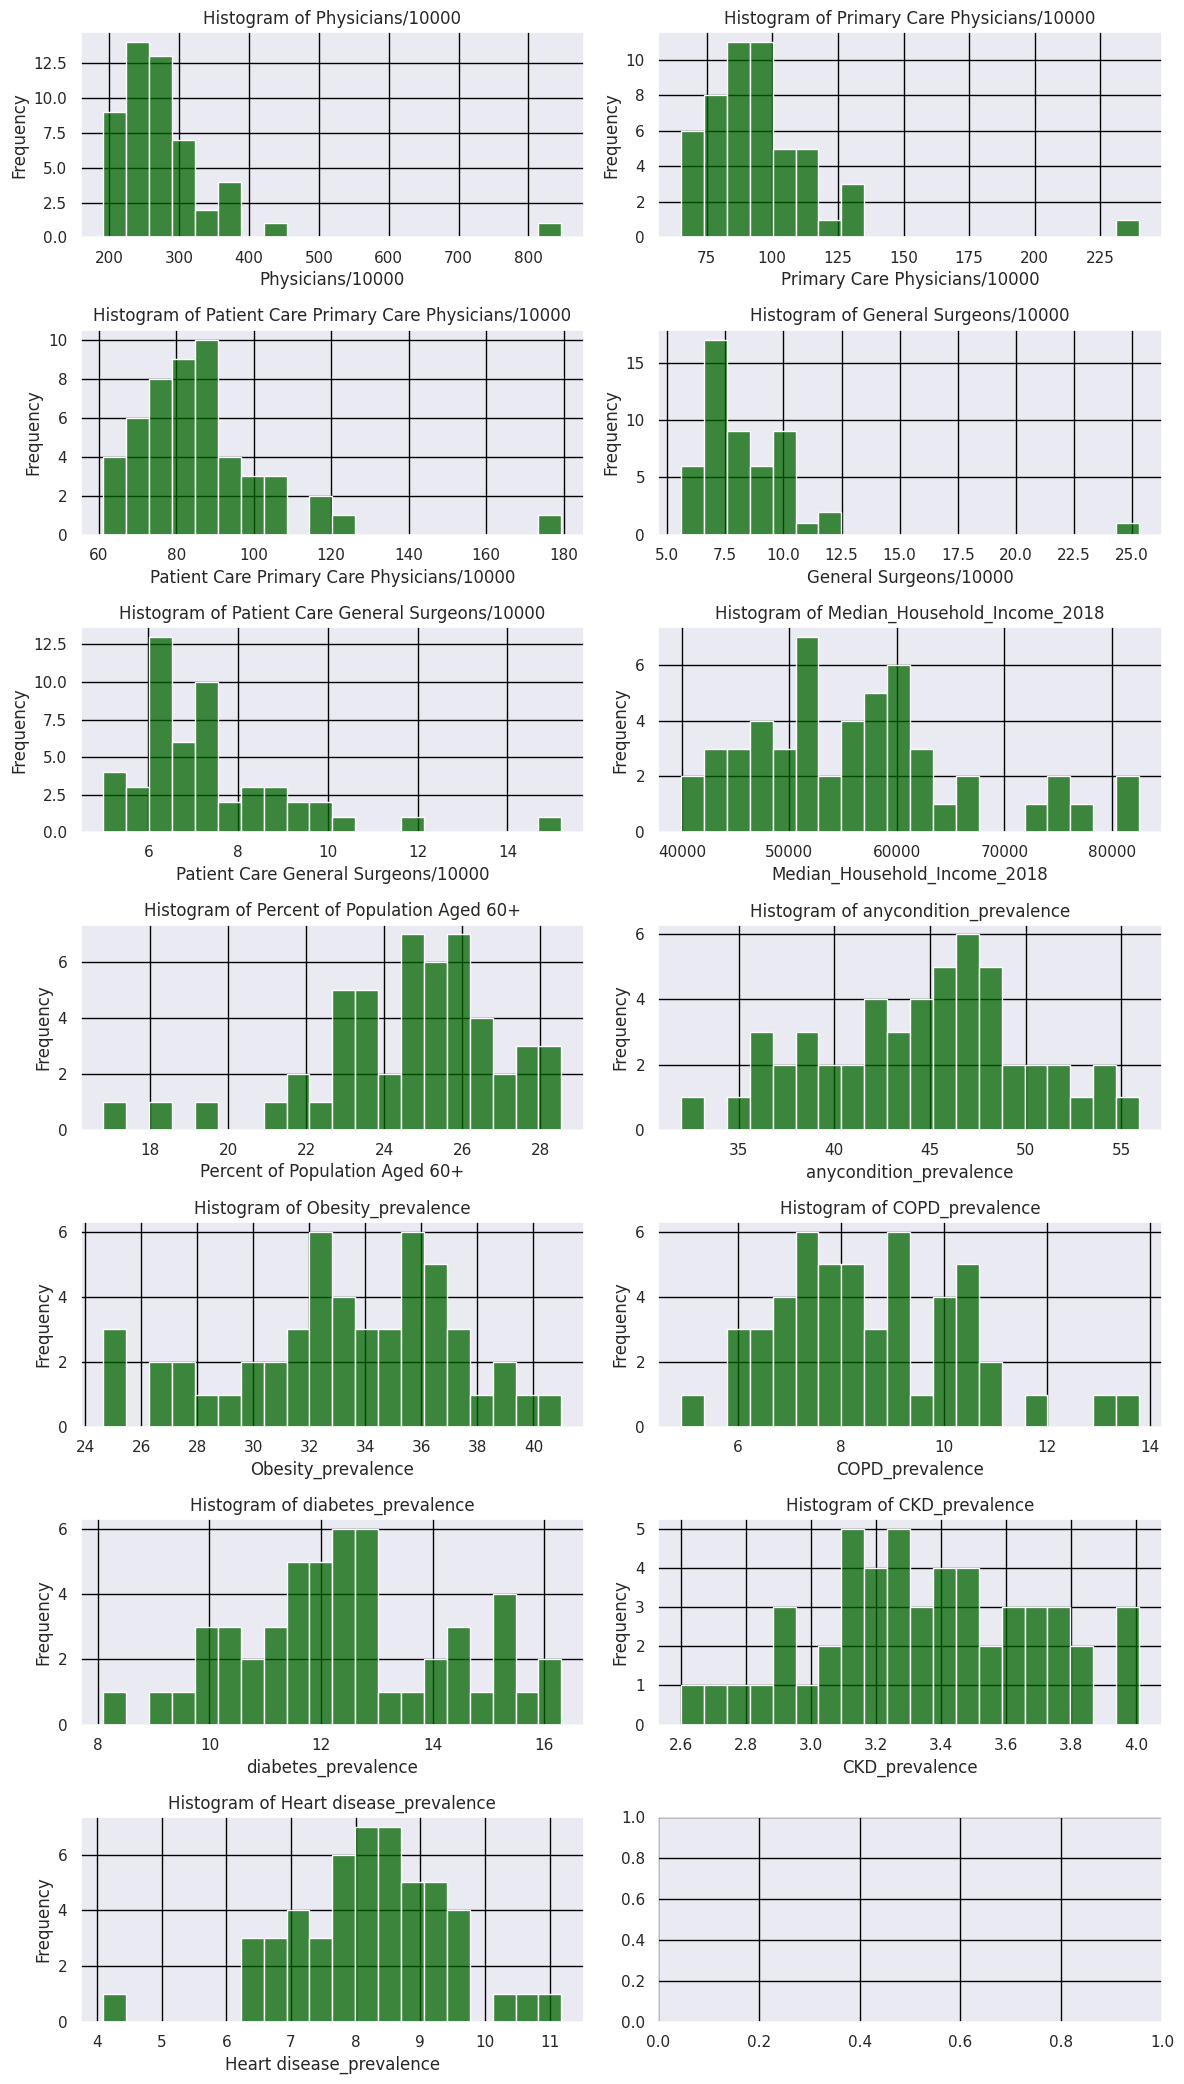

In [6]:
sns.set(rc={'axes.facecolor': '#eaeaf2', 'grid.color': 'black'})

# Get the number of columns in the DataFrame
num_columns = len(df_uni.columns)

# Set the number of subplots per row
num_subplots_per_row = 2

# Calculate the total number of rows needed
num_rows = (num_columns + num_subplots_per_row - 1) // num_subplots_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, 3 * num_rows))

# Flatten the subplot matrix for easier iteration
axes = axes.flatten()

# Iterate through each column and create a histogram
for i, column in enumerate(df_uni.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=False, bins=20, color='darkgreen', ax=ax)  # You can adjust the parameters according to your preferences
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

Upon a comprehensive review of the visual representations in the diagrams, a discernible pattern emerges—data distributions exhibit a notable degree of variability. This variability suggests that there is considerable fluctuation in the prevalence of medical conditions or health indicators across different states.

Moreover, an examination of the maximum and minimum values within these distributions reveals substantial differences. This divergence raises an important consideration: the possibility of unequal distribution of resources among states. This speculation gains significance given our utilization of percentages rather than absolute numerical values. The use of percentages inherently implies a proportional analysis, and thus, the observed disparities may signify variations in the availability or allocation of resources that contribute to the measured medical outcomes.

As we progress into subsequent phases of our analysis, a key objective will be to investigate whether these observed inequalities play a role in influencing cardiovascular issues. By exploring the relationships between the disparities in medical percentages and the prevalence of heart-related problems, we aim to unravel potential connections and gain deeper insights into the broader health landscape across different states in the United States. This multifaceted exploration will contribute to a more nuanced understanding of the factors influencing health outcomes and guide us in formulating targeted interventions or recommendations based on our findings.

In [7]:
# Factorize the State Name because in the multivariant analisis it may be relevant
df["STATE_NAME"], tag_list = pd.factorize(df["STATE_NAME"])


# Multivariant Analysis


Having already transformed the dataset into a numerical format, we now advance to the multivariate analysis phase. In this stage, we will explore the relationships between each variable and our target column, namely the prevalence of heart disease. For this purpose, we have opted for the utilization of Seaborn's regplot, a tool that allows us to visually represent the data dispersion through points. Additionally, the accompanying regression line provides valuable insights into the relationship between the compared variables, as indicated by its slope.

By employing regplot, we aim to uncover patterns, correlations, and potential dependencies between the various factors and the prevalence of heart disease. The scatter plot will give us a nuanced view of the data points' distribution, while the regression line will offer a quantitative understanding of the relationship strength and direction.

This analytical approach will guide us in identifying influential variables and assessing their impact on heart disease prevalence. It forms a critical step in unraveling the complex interplay of factors that contribute to cardiovascular health outcomes. As we proceed with this multivariate analysis, our goal is to extract meaningful insights that will inform subsequent steps in our data-driven exploration.

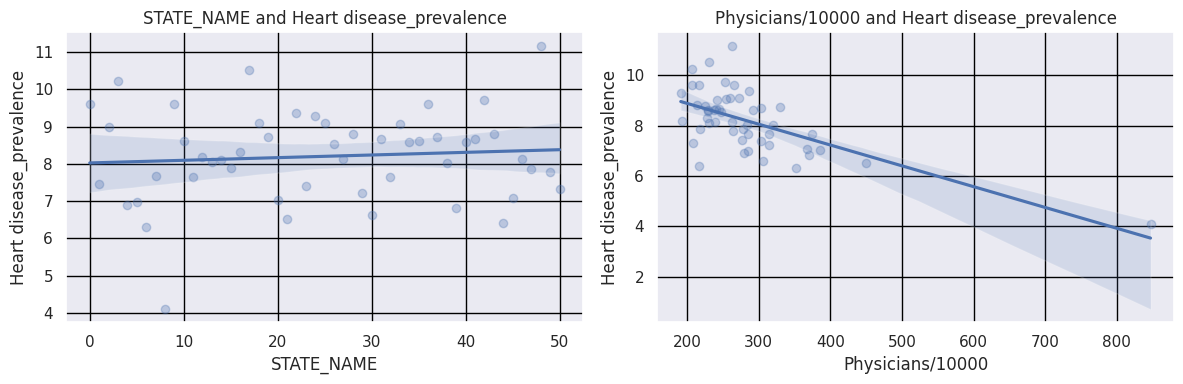

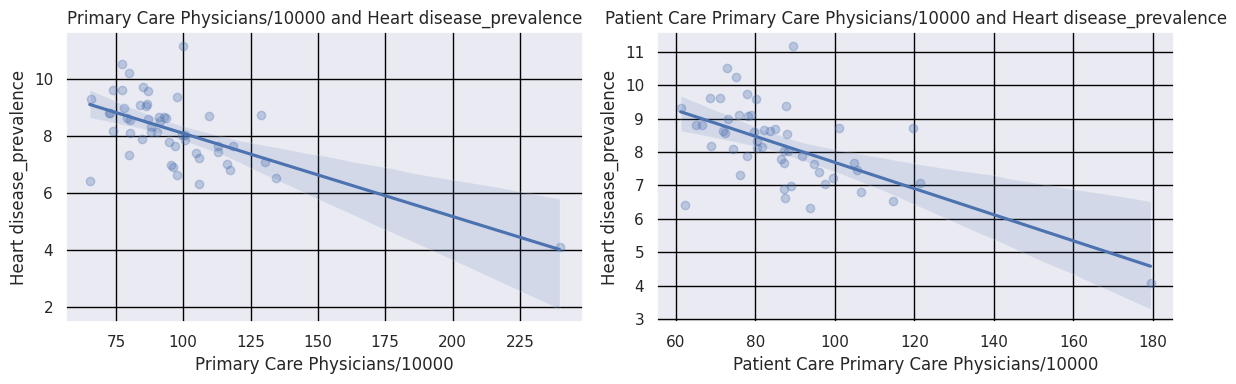

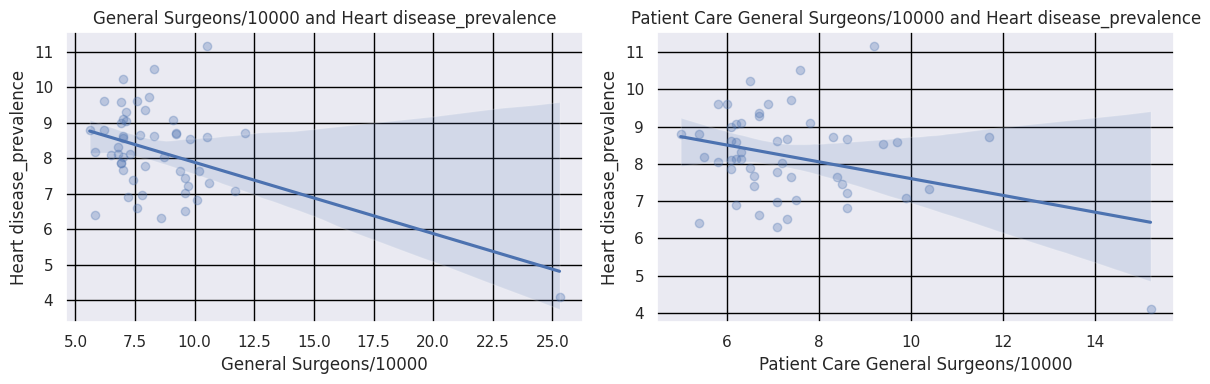

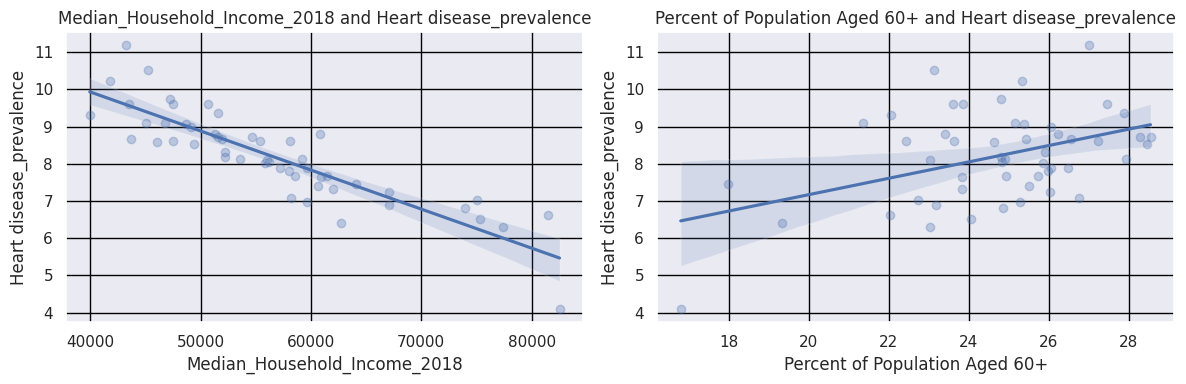

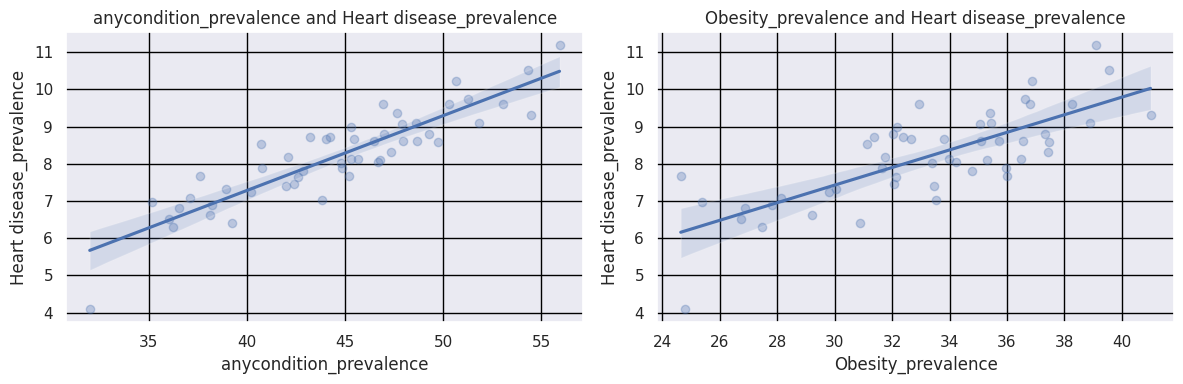

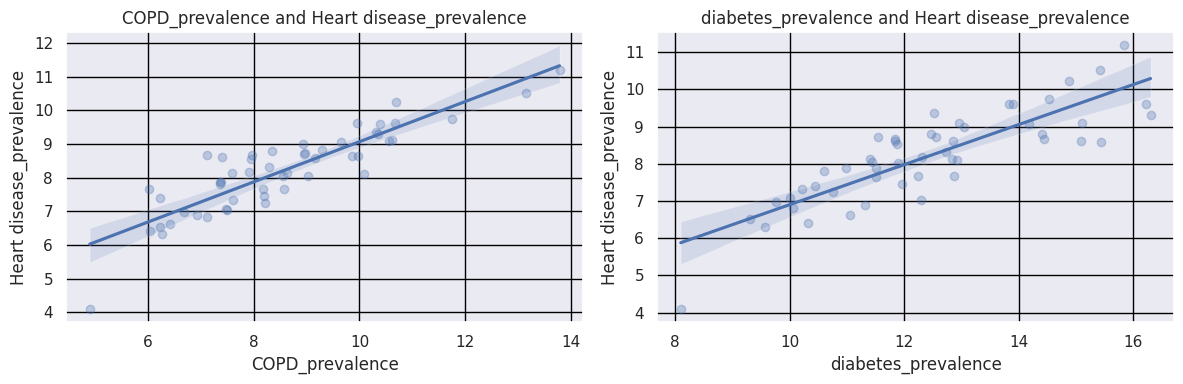

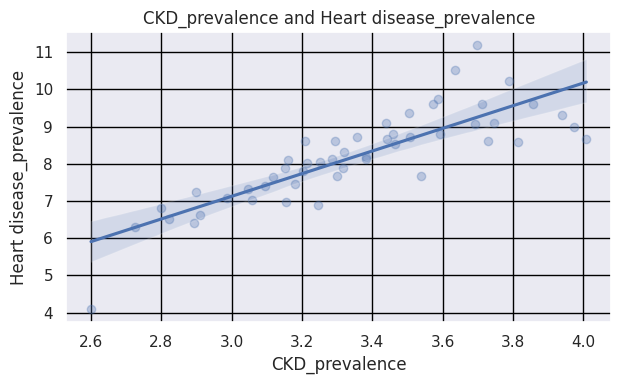

In [8]:
target_column = 'Heart disease_prevalence'

feature_columns = [col for col in df.columns if col != target_column]

# Split the columns into pairs
column_pairs = [(feature_columns[i], feature_columns[i+1]) if i+1 < len(feature_columns) else (feature_columns[i], None) for i in range(0, len(feature_columns), 2)]

# Iterate through column pairs and plot regplots
for pair in column_pairs:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Iterate over the two columns in the pair
    for i, feature_column in enumerate(pair):
        if feature_column is not None:
            # Create a scatter plot with regression line
            sns.regplot(x=feature_column, y=target_column, data=df, scatter_kws={'alpha': 0.3}, ax=axes[i])
            axes[i].set(title=f'{feature_column} and {target_column}', xlabel=feature_column)
        else:
            # If the column is None, remove the second axis
            fig.delaxes(axes[i])
    
    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()


The observations made in this analysis do not yield any particularly striking findings. As for the geographical location, we cannot confirm any definitive trends, as each state exhibits independent characteristics compared to others, resulting in highly scattered data and an almost flat curve.

As expected, the percentage of healthcare personnel does influence the number of cases of heart problems. However, it is noteworthy that many data points deviate significantly from the regression line, indicating a notable variance in the relationship.

A noteworthy aspect is the highly linear relationships with dispersions closely aligned to the regression line in the columns of median household income, anycondition, COPD, diabetes, and CKD. Even though with a higher mean squared error, the percentage of obesity also exhibits a somewhat linear relationship.

From this brief analysis, we can tentatively conclude that indeed, the availability of medical personnel in each state has an impact on heart problems. However, having any of the other conditions in the dataset and the median household income are likely to be much more influential factors when it comes to affecting heart problems. This emphasizes the importance of considering a broader set of factors beyond healthcare personnel when assessing the prevalence of heart issues.

In the upcoming correlation matrix, we will gain a comprehensive overview of all relationships among variables, providing confirmation of our previous observations. This matrix will serve as a valuable tool for assessing the degree and direction of associations between each pair of variables, offering a more nuanced understanding of the interdependencies within the dataset. By scrutinizing the correlation coefficients, we aim to identify additional patterns and confirm the significance of observed relationships. This step will contribute to a more thorough and holistic interpretation of the data, guiding us towards a more informed analysis of the factors influencing heart problems.

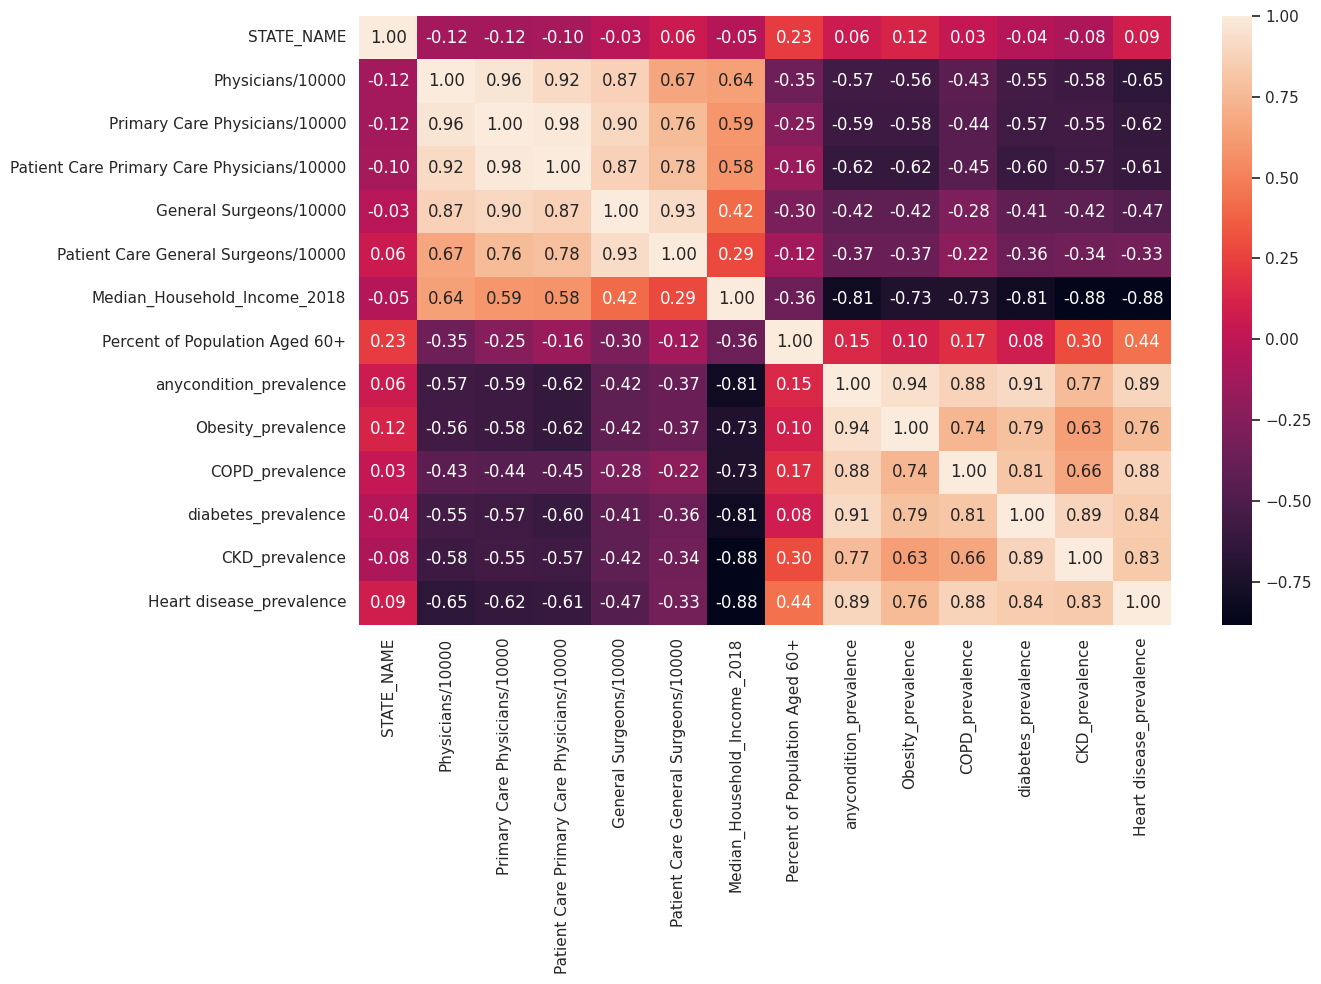

In [9]:
# Create a figure and axis using subplots with a specified size
fig, axis = plt.subplots(figsize=(14, 10))

# Get a list of column names from the DataFrame
lista_de_columnas = df.columns.tolist()

# Generate a heatmap of the correlation matrix of the DataFrame
# annot=True displays the correlation values on the heatmap
# fmt=".2f" formats the displayed values to two decimal places
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# Adjust the layout to prevent clipping of labels and annotations
plt.tight_layout()

# Display the heatmap
plt.show()


Indeed, we are poised to validate our earlier observations from the multivariate analysis through the forthcoming correlation matrix. As anticipated, a higher availability of healthcare professionals is correlated with a lower likelihood of experiencing heart problems. Conversely, a higher percentage of individuals with other health conditions increases the probability of facing cardiovascular issues. Additionally, the economic factor plays a substantial role; individuals with a more robust income source tend to have fewer health problems, bearing in mind the privatized healthcare system in the United States.

A noteworthy detail worth mentioning is the observation that the percentage of physicians has a more pronounced influence on reducing overall health issues compared to the percentage of surgeons. Regarding the diseases with the most significant correlations, assuming that any underlying health condition increases the risk, it is the chronic obstructive pulmonary disease (COPD) that stands out as having a higher correlation with heart problems. This surpasses both diabetes and, notably, obesity, a variable that I initially thought would be among the most influential.

This detailed examination reinforces the multifaceted nature of factors influencing heart health, shedding light on both healthcare accessibility and economic dimensions. As we delve deeper into these correlations, we gain a more nuanced understanding of the intricate relationships within the dataset, further informing our analysis of cardiovascular health determinants.

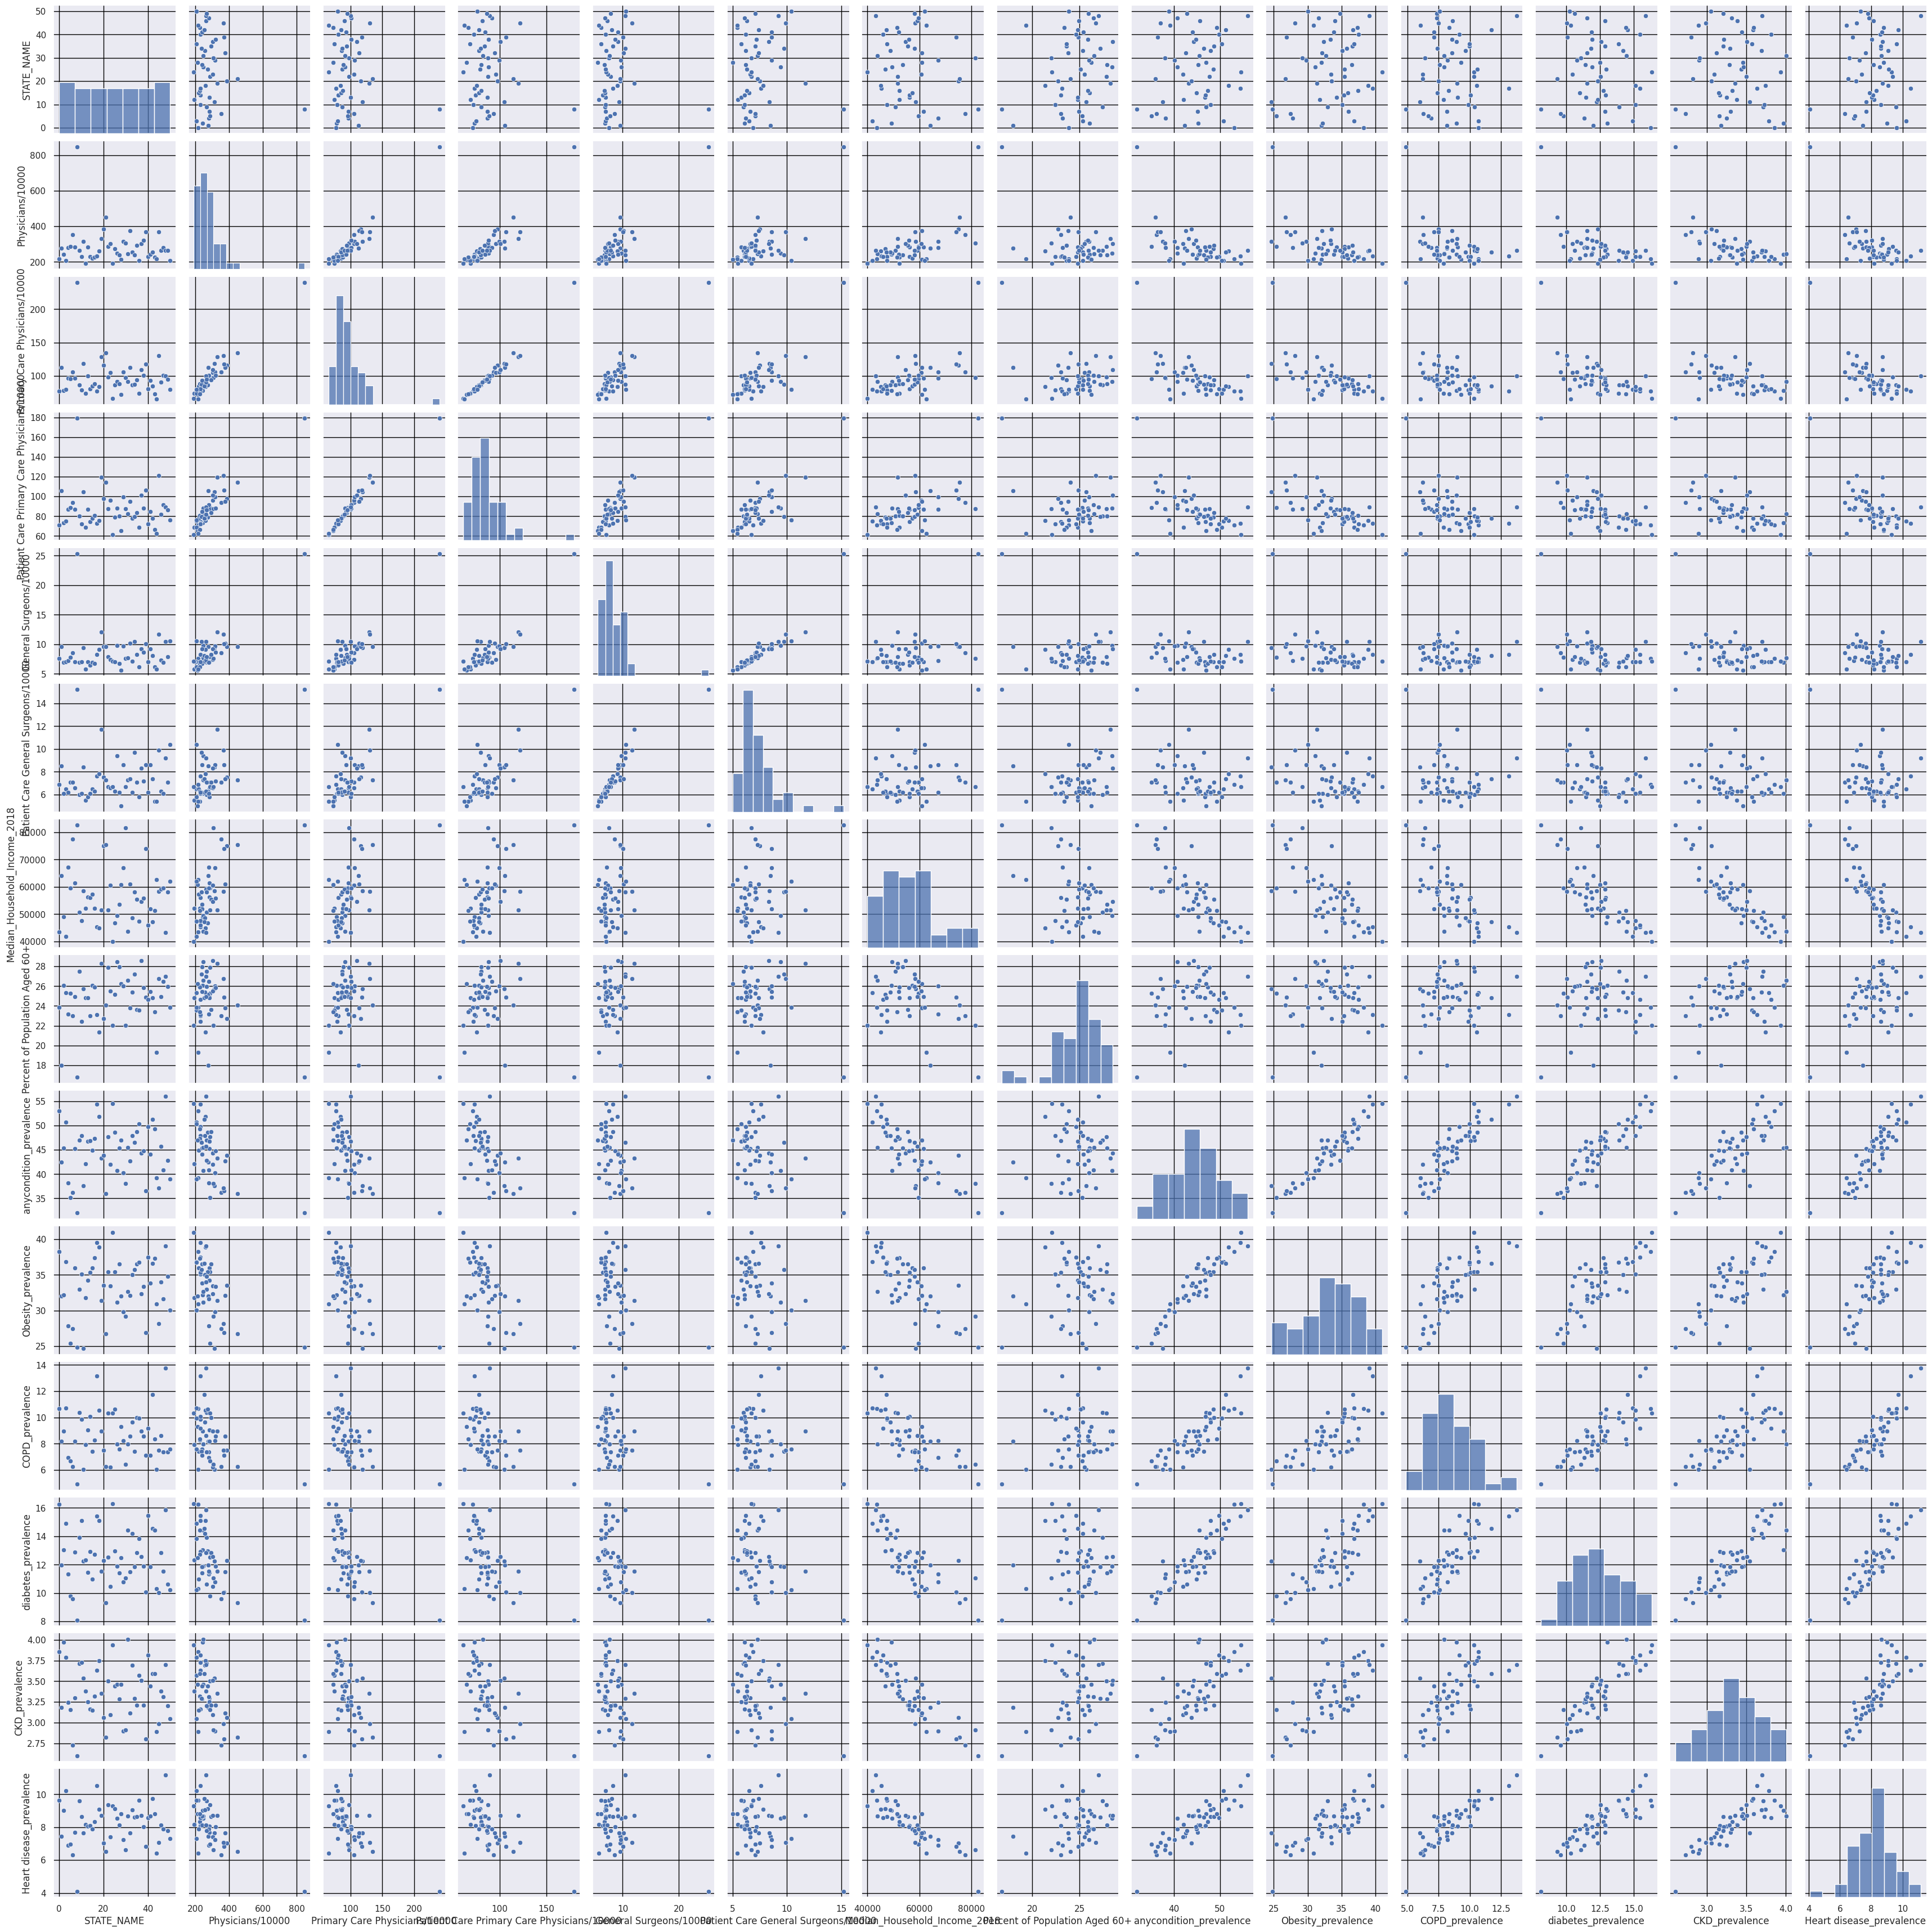

In [10]:
# Create a pair plot to visualize pairwise relationships in the DataFrame
sns.pairplot(data = df)

# Feature Engineering

## Outliers

In the feature engineering phase, our focus will be on analyzing outliers, as we identified several data points during the multivariate analysis that significantly deviated from the majority of the dataset. We will delve into understanding the nature of these outliers and subsequently assess the appropriate course of action.

Outliers can provide valuable insights into potential data anomalies, extreme conditions, or errors in measurement. By closely examining these data points, we aim to determine whether they represent genuine phenomena or if they are indicative of errors or irregularities in the dataset.

Once we have a clear understanding of the outliers and their significance, we can then make informed decisions about how to handle them. This may involve strategies such as transforming the data, imputing missing values, or, in some cases, removing outliers that can unduly influence our analysis.

Our objective in this feature engineering step is to ensure the robustness and reliability of our dataset, paving the way for more accurate and meaningful interpretations in the subsequent stages of our analysis.

The approach I plan to take is to sort the variables in descending order based on their standard deviation. This will provide us with columns where the difference between their quartiles is the most pronounced, which is a strong indicator of the presence of outliers.

This approach takes into account the interquartile range (IQR), an effective metric for detecting outliers by focusing on the dispersion of the central 50% of the data.

By prioritizing variables with the largest interquartile differences, we will identify those with significant variability in the center of the distribution. This will help uncover the presence of outliers that may require special attention during feature engineering.

Once we have this sorted list, we can conduct a more detailed analysis of those specific variables to better understand the nature of the outliers and determine the most appropriate strategy to address them, whether through imputation, data transformation, or, in some cases, selective removal.

In [11]:
# Generate descriptive statistics for the DataFrame using the describe() method and sort the transposed DataFrame based on the standard deviation (std) in descending order
df.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Median_Household_Income_2018,51.0,56443.872578,10266.643889,39932.719512,48898.753333,55861.895522,60857.734820,82533.000000
Physicians/10000,51.0,282.386275,97.435887,191.300000,230.150000,263.400000,303.050000,847.000000
Primary Care Physicians/10000,51.0,96.250980,26.097650,65.300000,80.200000,91.500000,102.850000,239.700000
Patient Care Primary Care Physicians/10000,51.0,86.760784,19.151492,61.200000,75.400000,83.700000,92.700000,179.400000
STATE_NAME,51.0,25.000000,14.866069,0.000000,12.500000,25.000000,37.500000,50.000000
anycondition_prevalence,51.0,44.583153,5.453419,32.000000,40.771543,45.200000,47.926481,55.930909
Obesity_prevalence,51.0,33.285587,3.976526,24.640000,31.246429,33.529167,36.248925,40.997561
General Surgeons/10000,51.0,8.433333,2.867380,5.600000,7.000000,7.700000,9.500000,25.300000
Percent of Population Aged 60+,51.0,24.697500,2.434465,16.800000,23.502559,24.933333,26.046061,28.544444
diabetes_prevalence,51.0,12.423432,1.930684,8.100000,11.189122,12.300000,13.873764,16.304878


<Axes: ylabel='Patient Care Primary Care Physicians/10000'>

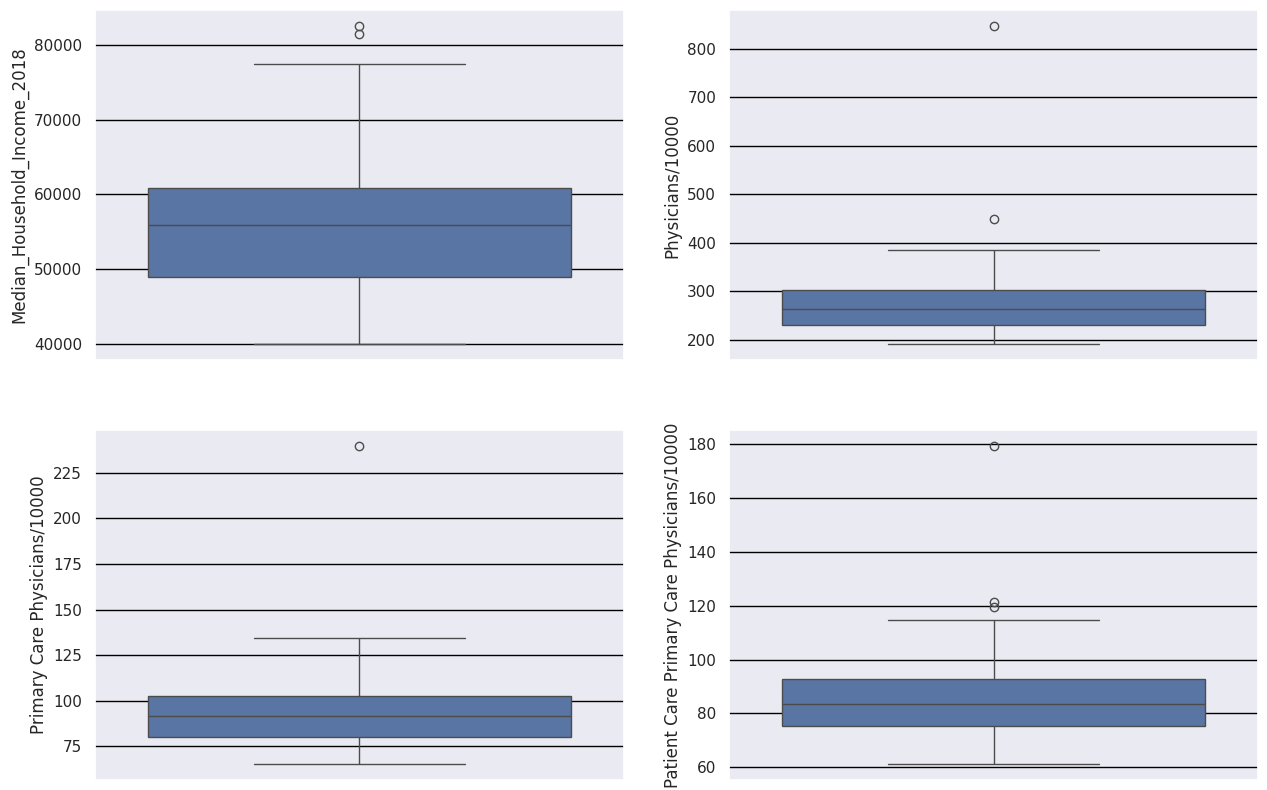

In [12]:
# Create a 2x2 grid of subplots in a figure with a specified size
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

# Create a boxplot for "Median_Household_Income_2018" in the first subplot (top-left)
sns.boxplot(ax=axis[0, 0], data=df, y="Median_Household_Income_2018")

# Create a boxplot for "Physicians/10000" in the second subplot (top-right)
sns.boxplot(ax=axis[0, 1], data=df, y="Physicians/10000")

# Create a boxplot for "Primary Care Physicians/10000" in the third subplot (bottom-left)
sns.boxplot(ax=axis[1, 0], data=df, y="Primary Care Physicians/10000")

# Create a boxplot for "Patient Care Primary Care Physicians/10000" in the fourth subplot (bottom-right)
sns.boxplot(ax=axis[1, 1], data=df, y="Patient Care Primary Care Physicians/10000")


The procedure I'm following now is to iterate through the columns that have shown the highest standard deviation, printing their maximum values to locate and visualize them.

In [13]:
# Define a list of column names to work the outliers
columns_to = [
    "Median_Household_Income_2018",
    "Physicians/10000",
    "Primary Care Physicians/10000",
    "Patient Care Primary Care Physicians/10000"
]

# Initialize an empty list to store the indices of outliers
outliers_idx = []

# Iterate through the specified columns and find the index of the maximum value in each column
for column in columns_to:
    outliers_idx.append(df[column].idxmax())

# Iterate through the indices of outliers and print corresponding information
for idx in outliers_idx:
    print("")
    # Assuming there is a list called tag_list, print the tag associated with the outlier
    print(tag_list[idx])
    
    # Print the entire row (data) corresponding to the outlier index
    print(df.iloc[idx])



District of Columbia
STATE_NAME                                        8.0
Physicians/10000                                847.0
Primary Care Physicians/10000                   239.7
Patient Care Primary Care Physicians/10000      179.4
General Surgeons/10000                           25.3
Patient Care General Surgeons/10000              15.2
Median_Household_Income_2018                  82533.0
Percent of Population Aged 60+                   16.8
anycondition_prevalence                          32.0
Obesity_prevalence                               24.8
COPD_prevalence                                   4.9
diabetes_prevalence                               8.1
CKD_prevalence                                    2.6
Heart disease_prevalence                          4.1
Name: 8, dtype: float64

District of Columbia
STATE_NAME                                        8.0
Physicians/10000                                847.0
Primary Care Physicians/10000                   239.7
Patient Care P

We have observed that all the outliers belong to the District of Columbia and that these values are significantly distant from our mean. While it's possible that these values are accurate, cross-referencing, for instance, the median household income with U.S. Census data shows similar values. The count of healthcare personnel is also available on the CDC website (https://www.cdc.gov/nchs/data/hus/2019/fig16-508.pdf), confirming that the District of Columbia indeed has the highest number of healthcare professionals per capita.

Nevertheless, even after verifying and cross-referencing this information, and acknowledging its accuracy, we have decided to take the drastic step of entirely removing the District of Columbia from our model. The rationale behind this decision is that it is an isolated case that behaves differently from the rest of the states. Including it in our model might introduce noise and not contribute meaningfully to the overall analysis.

In [14]:
# Delete row Columbia
df = df[df['STATE_NAME'] != 'Columbia']

## Nulls

At this point, we will double-check that we are not handling any null values.







In [15]:
# Calculate the percentage of missing values for each column in the DataFrame
df.isnull().sum().sort_values(ascending=False) / len(df)

STATE_NAME                                    0.0
Physicians/10000                              0.0
Primary Care Physicians/10000                 0.0
Patient Care Primary Care Physicians/10000    0.0
General Surgeons/10000                        0.0
Patient Care General Surgeons/10000           0.0
Median_Household_Income_2018                  0.0
Percent of Population Aged 60+                0.0
anycondition_prevalence                       0.0
Obesity_prevalence                            0.0
COPD_prevalence                               0.0
diabetes_prevalence                           0.0
CKD_prevalence                                0.0
Heart disease_prevalence                      0.0
dtype: float64

# Feature Selection

## Train/Test Split

We have successfully prepared the dataset for division into training and testing sets, laying the foundation for model training in the subsequent notebook. Should you have any additional steps or inquiries, please do not hesitate to communicate them.

In [16]:
# Split the DataFrame into features (X) and target variable (y)
X = df.drop("Heart disease_prevalence", axis = 1)
y = df["Heart disease_prevalence"]

# Split the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [17]:
# Save the training and testing sets into separate CSV files without including the index
y_train.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_y_train.csv", index=False)
y_test.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_y_test.csv", index=False)
X_train.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_X_train.csv", index=False)
X_test.to_csv("/workspaces/EDA_4/data/processed/heart_prevalence_X_test.csv", index=False)

In [18]:
# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training set and create a DataFrame with the standardized values
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index)

# Transform the testing set and create a DataFrame with the standardized values
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index)

# Save the trained scaler in a file named "scaler_std.pk" for future use
dump(scaler, open("/workspaces/EDA_4/models/scaler_std.pk", "wb"))

In [19]:
# Display the first rows just to verify it has been normalized correctly
X_train_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
50,1.592553,-1.142601,-0.758344,-0.524870,1.724298,2.504393,0.820420,-0.393446,-1.254632,-1.034310,-0.690028,-1.329247,-1.063396
38,0.802857,1.195765,0.657546,0.402394,0.477422,0.081398,0.113865,0.558434,-0.126974,-0.141938,-0.158183,-0.433800,-0.535918
16,-0.644918,-0.733491,-0.205473,-0.192600,-0.769453,-0.600070,-0.311410,0.579479,0.363973,0.936350,-0.307709,0.011809,-0.196489
29,0.210586,1.083623,1.001405,1.283295,1.133672,1.141458,1.409531,0.635620,-1.011609,-1.099331,-0.350395,-1.043889,-1.534241
31,0.342202,-0.376298,0.003540,-0.068965,-0.178828,0.157116,-1.292706,0.882003,0.003443,-0.337835,-0.487564,0.924241,1.998352


In [20]:
# Save the normalized training and testing sets into separate CSV files without including the index
X_train_norm.to_csv("/workspaces/EDA_4/data/interim/heart_prevalence_X_train_std.csv", index=False)
X_test_norm.to_csv("/workspaces/EDA_4/data/interim/heart_prevalence_X_test_std.csv", index=False)